**Import Libraries**

Import plantuml, iplantuml (for the json visualisation) and json for the formatting

In [1]:
import iplantuml
import plantuml
import json
import jdk


**Input the data**

During the initial threat modelling session ensure you discover the flows, the infrastructure, the actors, the risks, threats and security controls. The architecture diagram would be created before the session by the security champion or dedicated developer. The actions will be logged in Notion and Jira tickets created for tracking. After you had a threat modelling session input the data as commented below. Ensure that on every threat modelling session you have invited the security champions and at least one member of the Platform team as they can provide valuable contribution / input. If the data requested is not applicable leave the double quotes empty. 

In [2]:
#date in format year-month-day
#insert repos only if multiple ones exist rather than the one where this lives
#TM-Maturity reflects the maturity of the threat model performed
#Date of next review to be agreed with security team based on the findings, next steps and maturity model
#Tier is derrived from this formula: 
#if external and at least two other -> "critical", if external or business critical -> "high",
#if handles / stores PII -> "medium", else -> "low"



#avoid spaces for service name in scope due to naming convention for output json
scope = "The-service-in-scope"


#date in format year-month-day
metadata = {
    "Date of review": "2022-08-05",
    "Date of next review": "2022-10-01",
    "Version": "v0.1",
    "Scope": "The-service-in-scope",
    "TM-Maturity": "Settler / Pioneer",
    "Tier": "1/2/3/4"
}

#insert repos only if multiple ones exist rather than the one where this lives

repos = [
    "https://github.com/xxx",
    "https://github.com/xxx",
    "https://github.com/xxx",
]

code_review = {
    "Code Reviewed by": "Reviewer Name",
    "Findings": {
        "Finidng One": "Recoomendation",
        "Finding Two": "Reccomendation"
    }
    
    
}

security_testing = {
    "Penetration test": "Reccomendation",
    "SAST": "Reccomendation",
    "Other tests": "Reccomendation"
}

live = "Not Live / Live"

#questions to be answered by platform team or dev team accordingly - on the threat modelling session
#leave empty anything that is not applicable (as "")

#Infra/dev or Infosec to answer - if the answer for port is public yes - note if it stands behind a WAF
#If opening new port insert the info below, if new endpoints then input the enpoint information.


ne_port_placeholder = {
    "New Port": "XX",
    "Public": {"Yes": "why is it public??"}, 
    "Restricted Security Group": "Yes hopefully?"
}


new_attack_surface_placeholder = {
    "New Endpoint that was opened": {
        "Public": "Yes",
        "Authentication": "Yes - JWT tokens",
        "Is it behind an API Gateway": "Yes, 1 API Gateway, 5 endpoints"
    },
    "New Enpoint that was opened": {
        "Public": "No",
        "Authentication": "Yes",
        "Is it behind an API Gateway": "Yes"
    }
}

#New Open source or third party libraries added
os = [""]

#interaction with the application / endpoint / port? Employee, service, patient or third party? 

actors = { 
    "Actor": "Roles/privileges that this actor has",
    "DevOps": "Full admin access",
    "User": "Privileges / Roles/ Authentication"
}

#Write which type of storage - including cloud storage, databases and storage ques (storage field) - DynamoDB, RDS, SQL, S3, SNS, SQS. 
#Write associated types of data that the storage holds (PII, financial data or other sensitive data)
storage = {
    "DynamoDB": "Any confidential, sensitive data stored?",
    "My SQL": "Sensitive"
}

#confirm with infra
    

#You can also input a trust zone if preferred more than trust boundary. Identify them during the threat modelling session. 
trust_b = {
    "Internet": "Service-in-scope",
    "Service-in-scope": "Database"

}

#what new infrastructure components will be created to create the new services? Containers, Lambdas, Databases...
#every infrastructure component can have some metadata associated (see the lambda example below)
infra = {
        "Lambdas": {
            "SAST": "Yes",
            "Behind Api Gateway": "Yes, API key Authentication",
            "Minimal Privilege": "AWS least privilege policies - access given explicitly"
        }
}


#determine the services that the application in scope interacts with and complete

interaction = {
    scope: [
        "XX Service",
        "XYZ Service",
        "ZYT Service"]
}


#put additional links here
links = [
    "linktosomedocumentation.com",
    "linktomoredocs.com"
]


#outstanding and next steps


next_steps = [
        "Adress security controls before production",
        "Risk asessment / security review if any new feature or external endpoint added",
        "Code Review once developed",
        "Evolution of diagrams - store diagrams in repo",
        "List endpoints and ports",
        "Understand more the roles of the actors"
]


**Output**

The deliverables of every threat modelling session would be the risks, threats, facts, actions and controls. actions can be logged below or can be logged in Confluence and associated with Jira tickets. The risk treatment can be to accept the risk, mitigate, transfer ... It is a decision on the action or non-action involving the risk raised. When noting down the threat actors note the actor and the skill. Facts are important statements that reflect the current architecture. The can be just information about users and their access or existing security controls. 

In [3]:


risks = {
    "Interesting risk": {
        "Level": "High",
        "Treatment": "This mitigation will really help"
    },
    "A risk raised": {
        "Level": "Medium",
        "Treatment": "Accept"
    }
}
    




threats = {
    
    "User changing/ viewing their own or other user's details (data integrity)": {
        "Existing Control": "Feature flag preventing access to regular users on the UI.",
        "Threat Actors": "Internal Actor, low skilled",
        "Priority": "High"
    },
    
    "Internal or external actor injecting malicious code or unauthorised requests via the UI": { 
        "Existing Control": "WAF prevents injection requests.",
        "Suggested Control": "Input validation using json schema and OWASP cheat sheets to prevent the <script> tag and other injections, output encoding and sanitisation.",
        "Threat Actor": "Skilled Attacker / Security Researcher",
        "Priority": "Critical"
    },
    
    
    "Malicious request can be sent through the internal Lambdas and extract information from databases": {
        "Existiong Control": "The databases and Lambdas are internal and would need a highly complex attack to execute the threat.",
        "Suggested Control": "Input validation using json schema and OWASP cheat sheets to prevent the <script> tag and other injections.",
        "Threat Actors": "External Researcher, highly skilled or internal threat actor",
        "Priority": "High"
    },
    
    "A vulnerable library can be used to compromise the UI": {
        "Existiong Control": [
            "The UI sits behind WAF.",
            "The vulnerable service can only be called from the XY UI which is only accessed via SSO"
        ],
        "Suggested Control": "Address all vulnerable dependencies",
        "Threat Actors": "External Researcher, highly skilled",
        "Priority": "Medium"
    },
    
}

            
        
     
facts = [
    "User can access the UI via a page on XX UI.",
    "The User can read and input data into the database x via the XY Service.",
    "The users can only access the UI via the VPN.",
    "There is a feature flag on the XY System that prevents anyone but the dedicated users accessing the system.",
    "Only Lambdas and the DevOps team have access to the databases (roles).",
    "Access to Databases is audited and logged with XYZ",
    "Lambdas and databases can only be accessed within the VPC.",
    "Endpoint A, B and C are being reused for this project."

]


vuln = "Input the vulnerability strategy for this project (will the vulnerabilities be addressed via standard processes or differently)"


**Forming the Json**

Run the below cell to form the python dictionary which will then be transformed into the Json. 

In [4]:
output = {
    "Threats": threats,
    "Facts": facts,
    "Code Review": code_review,
    "Security Testing": security_testing,
    "Next Steps": next_steps
}

data = {
    "Scope": scope,
    "Metadata": metadata,
    "Repos": repos,
    "Live": "",
    "Attack Surface": [
        new_attack_surface_placeholder,
        ne_port_placeholder,
    ],
    "Introduced libraries and Open Source Components": os,
    "Actors/Users": actors,
    "Storage": storage, 
    "Trust Boundaries": trust_b,
    "Infrastructure": infra,
    "Interactions of service in scope with existing service": interaction,
    "Output": output
}

**Stripping the Empties**

Any inputs / data that is left empty (between the double quotes) gets stripped out with the cell below

In [5]:
def strip_empties_from_list(data):
    new_data = []
    for v in data:
        if isinstance(v, dict):
            v = strip_empties_from_dict(v)
        elif isinstance(v, list):
            v = strip_empties_from_list(v)
        if v not in (None, str(), list(), dict(),):
            new_data.append(v)
    return new_data


def strip_empties_from_dict(data):
    new_data = {}
    for k, v in data.items():
        if isinstance(v, dict):
            v = strip_empties_from_dict(v)
        elif isinstance(v, list):
            v = strip_empties_from_list(v)
        if v not in (None, str(), list(), dict(),):
            new_data[k] = v
    return new_data




**Creating the json**

Run the below cell to create and print the json. This will create an empty json file. Copy-paste the printed json into the Plantuml. Also copy-paste it into the empty json. The output json can be then tweaked and updated with new data / facts / risks...

In [6]:
stripped_data = strip_empties_from_dict(data)
print(stripped_data)

json_object = json.dumps(stripped_data, indent = 4) 
print(json_object)



{'Scope': 'The-service-in-scope', 'Metadata': {'Date of review': '2022-08-05', 'Date of next review': '2022-10-01', 'Version': 'v0.1', 'Scope': 'The-service-in-scope', 'TM-Maturity': 'Settler / Pioneer', 'Tier': '1/2/3/4'}, 'Repos': ['https://github.com/xxx', 'https://github.com/xxx', 'https://github.com/xxx'], 'Attack Surface': [{'New Endpoint that was opened': {'Public': 'Yes', 'Authentication': 'Yes - JWT tokens', 'Is it behind an API Gateway': 'Yes, 1 API Gateway, 5 endpoints'}, 'New Enpoint that was opened': {'Public': 'No', 'Authentication': 'Yes', 'Is it behind an API Gateway': 'Yes'}}, {'New Port': 'XX', 'Public': {'Yes': 'why is it public??'}, 'Restricted Security Group': 'Yes hopefully?'}], 'Actors/Users': {'Actor': 'Roles/privileges that this actor has', 'DevOps': 'Full admin access', 'User': 'Privileges / Roles/ Authentication'}, 'Storage': {'DynamoDB': 'Any confidential, sensitive data stored?', 'My SQL': 'Sensitive'}, 'Trust Boundaries': {'Internet': 'Service-in-scope', '

**Creating the PlantUML graph**

Copy paste the json in between @startjson and @endjson. Change the parameter "name" to the desired name of the threat modelling graph. Copy paste the graph into the Confluence page and commit it into Github. do not change any other PlantUML parameters. The .jar file needs to be in the same folder as this notebook. 


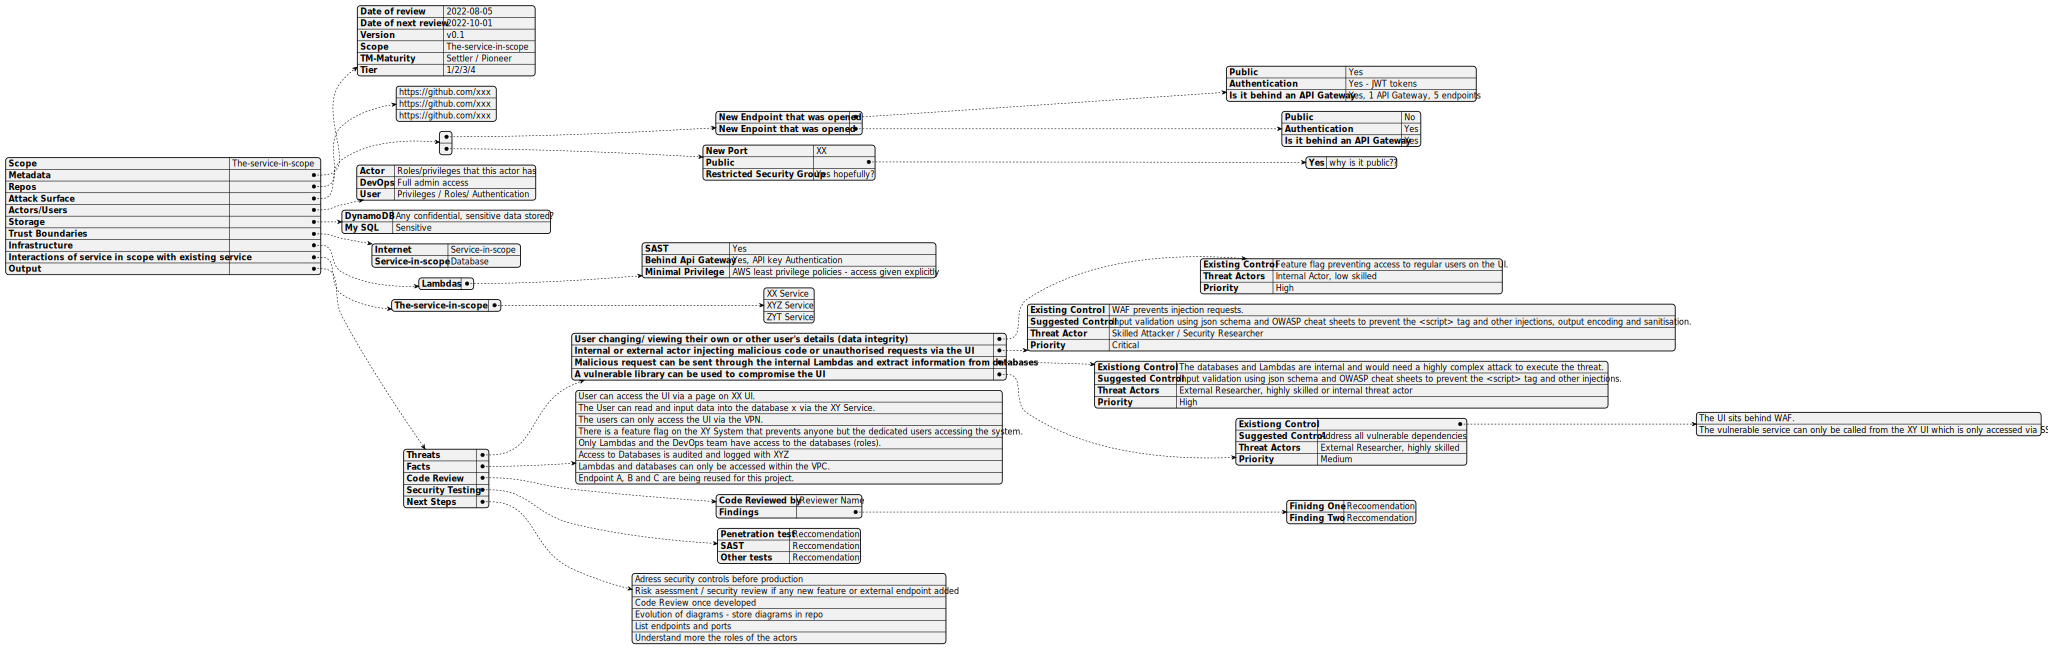

In [7]:
%%plantuml --jar -p plantuml.jar -n name
    
    
@startjson


{
    "Scope": "The-service-in-scope",
    "Metadata": {
        "Date of review": "2022-08-05",
        "Date of next review": "2022-10-01",
        "Version": "v0.1",
        "Scope": "The-service-in-scope",
        "TM-Maturity": "Settler / Pioneer",
        "Tier": "1/2/3/4"
    },
    "Repos": [
        "https://github.com/xxx",
        "https://github.com/xxx",
        "https://github.com/xxx"
    ],
    "Attack Surface": [
        {
            "New Endpoint that was opened": {
                "Public": "Yes",
                "Authentication": "Yes - JWT tokens",
                "Is it behind an API Gateway": "Yes, 1 API Gateway, 5 endpoints"
            },
            "New Enpoint that was opened": {
                "Public": "No",
                "Authentication": "Yes",
                "Is it behind an API Gateway": "Yes"
            }
        },
        {
            "New Port": "XX",
            "Public": {
                "Yes": "why is it public??"
            },
            "Restricted Security Group": "Yes hopefully?"
        }
    ],
    "Actors/Users": {
        "Actor": "Roles/privileges that this actor has",
        "DevOps": "Full admin access",
        "User": "Privileges / Roles/ Authentication"
    },
    "Storage": {
        "DynamoDB": "Any confidential, sensitive data stored?",
        "My SQL": "Sensitive"
    },
    "Trust Boundaries": {
        "Internet": "Service-in-scope",
        "Service-in-scope": "Database"
    },
    "Infrastructure": {
        "Lambdas": {
            "SAST": "Yes",
            "Behind Api Gateway": "Yes, API key Authentication",
            "Minimal Privilege": "AWS least privilege policies - access given explicitly"
        }
    },
    "Interactions of service in scope with existing service": {
        "The-service-in-scope": [
            "XX Service",
            "XYZ Service",
            "ZYT Service"
        ]
    },
    "Output": {
        "Threats": {
            "User changing/ viewing their own or other user's details (data integrity)": {
                "Existing Control": "Feature flag preventing access to regular users on the UI.",
                "Threat Actors": "Internal Actor, low skilled",
                "Priority": "High"
            },
            "Internal or external actor injecting malicious code or unauthorised requests via the UI": {
                "Existing Control": "WAF prevents injection requests.",
                "Suggested Control": "Input validation using json schema and OWASP cheat sheets to prevent the <script> tag and other injections, output encoding and sanitisation.",
                "Threat Actor": "Skilled Attacker / Security Researcher",
                "Priority": "Critical"
            },
            "Malicious request can be sent through the internal Lambdas and extract information from databases": {
                "Existiong Control": "The databases and Lambdas are internal and would need a highly complex attack to execute the threat.",
                "Suggested Control": "Input validation using json schema and OWASP cheat sheets to prevent the <script> tag and other injections.",
                "Threat Actors": "External Researcher, highly skilled or internal threat actor",
                "Priority": "High"
            },
            "A vulnerable library can be used to compromise the UI": {
                "Existiong Control": [
                    "The UI sits behind WAF.",
                    "The vulnerable service can only be called from the XY UI which is only accessed via SSO"
                ],
                "Suggested Control": "Address all vulnerable dependencies",
                "Threat Actors": "External Researcher, highly skilled",
                "Priority": "Medium"
            }
        },
        "Facts": [
            "User can access the UI via a page on XX UI.",
            "The User can read and input data into the database x via the XY Service.",
            "The users can only access the UI via the VPN.",
            "There is a feature flag on the XY System that prevents anyone but the dedicated users accessing the system.",
            "Only Lambdas and the DevOps team have access to the databases (roles).",
            "Access to Databases is audited and logged with XYZ",
            "Lambdas and databases can only be accessed within the VPC.",
            "Endpoint A, B and C are being reused for this project."
        ],
        "Code Review": {
            "Code Reviewed by": "Reviewer Name",
            "Findings": {
                "Finidng One": "Recoomendation",
                "Finding Two": "Reccomendation"
            }
        },
        "Security Testing": {
            "Penetration test": "Reccomendation",
            "SAST": "Reccomendation",
            "Other tests": "Reccomendation"
        },
        "Next Steps": [
            "Adress security controls before production",
            "Risk asessment / security review if any new feature or external endpoint added",
            "Code Review once developed",
            "Evolution of diagrams - store diagrams in repo",
            "List endpoints and ports",
            "Understand more the roles of the actors"
        ]
    }
}



@endjson 